#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


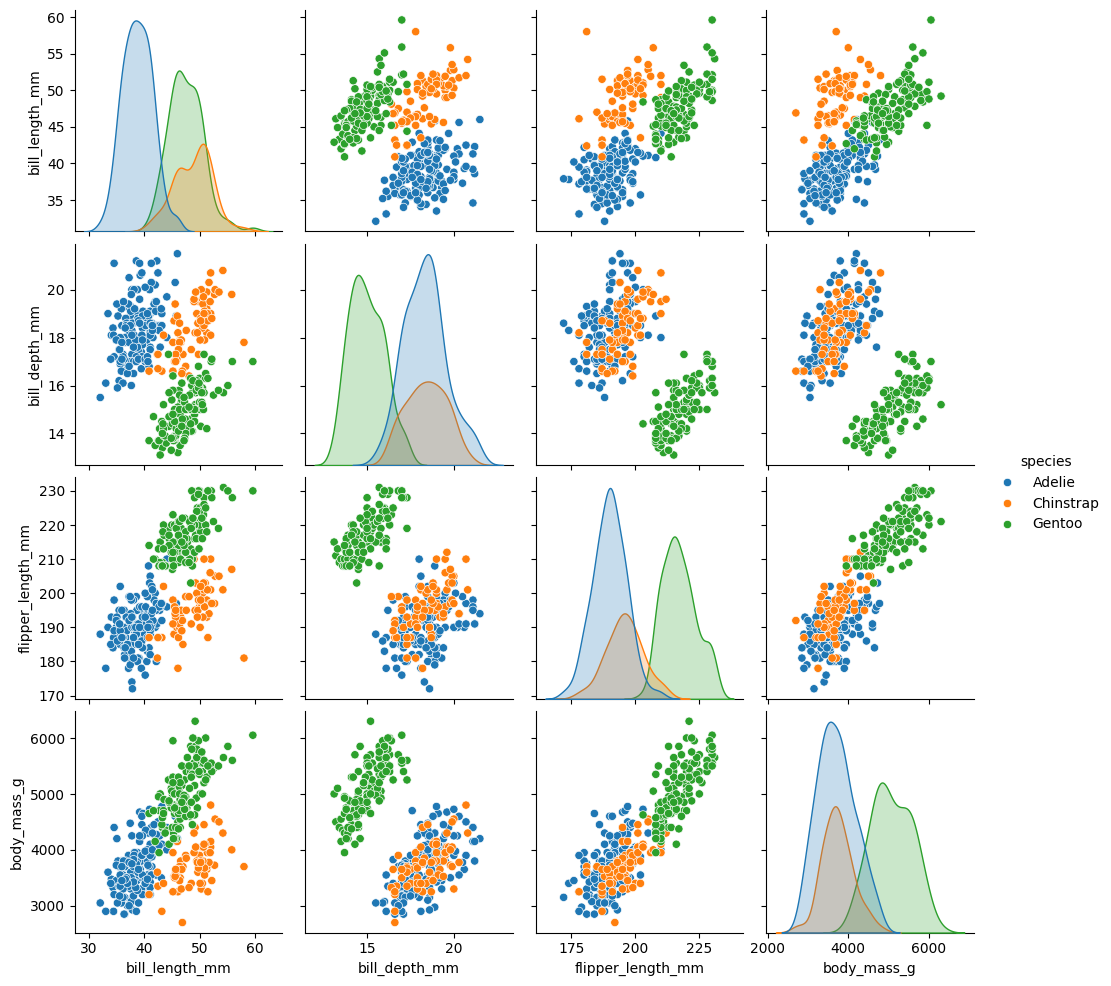

In [11]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score
import matplotlib.pyplot as plt


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

Атрибуты датафрейма:

species	- разновидность

island	- остров

bill_length_mm	- длина клюва (мм)

bill_depth_mm	- глубина клюва (мм)

flipper_length_mm	- длинна ласта (мм)

body_mass_g	- масса тела (гр)

sex - пол

In [2]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [3]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Нулевые значения отсуствуют

In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [31]:
X = penguins.iloc[:, [2,3,4,5]].values
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

**Используем метод локтя для поиска оптимального количества кластеров**

In [32]:
wcss = [] #список для суммы квадратов расстояний

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++" ,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ - это сумма квадратов расстояний

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Сумма квадратов расстояний')

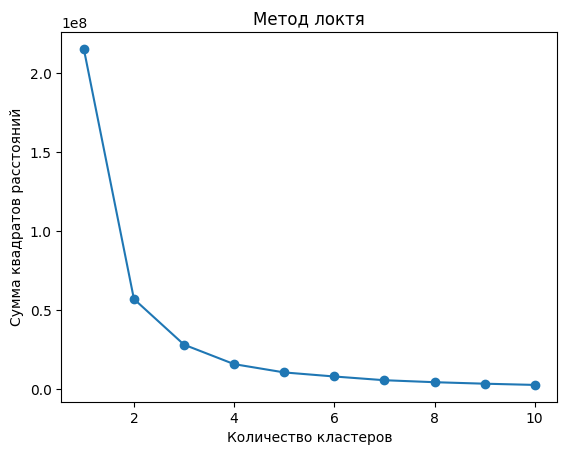

In [33]:
plt.plot(range(1, 11), wcss,  marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')

Таким образом, оптимальное количество кластеров равно 3, тк после этого сумма квадратов расстояний не изменяется так сильно.


**Проведём кластеризацию с помощью k-means**



In [34]:
numeric_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]#создание списка с числовыми данными
x = penguins[numeric_features]

In [39]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(x)
penguins["cluster"] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Оценка однородности: 0.400588423922462
Оценка полноты: 0.4052070636873124
v_measure: 0.4028845072990955


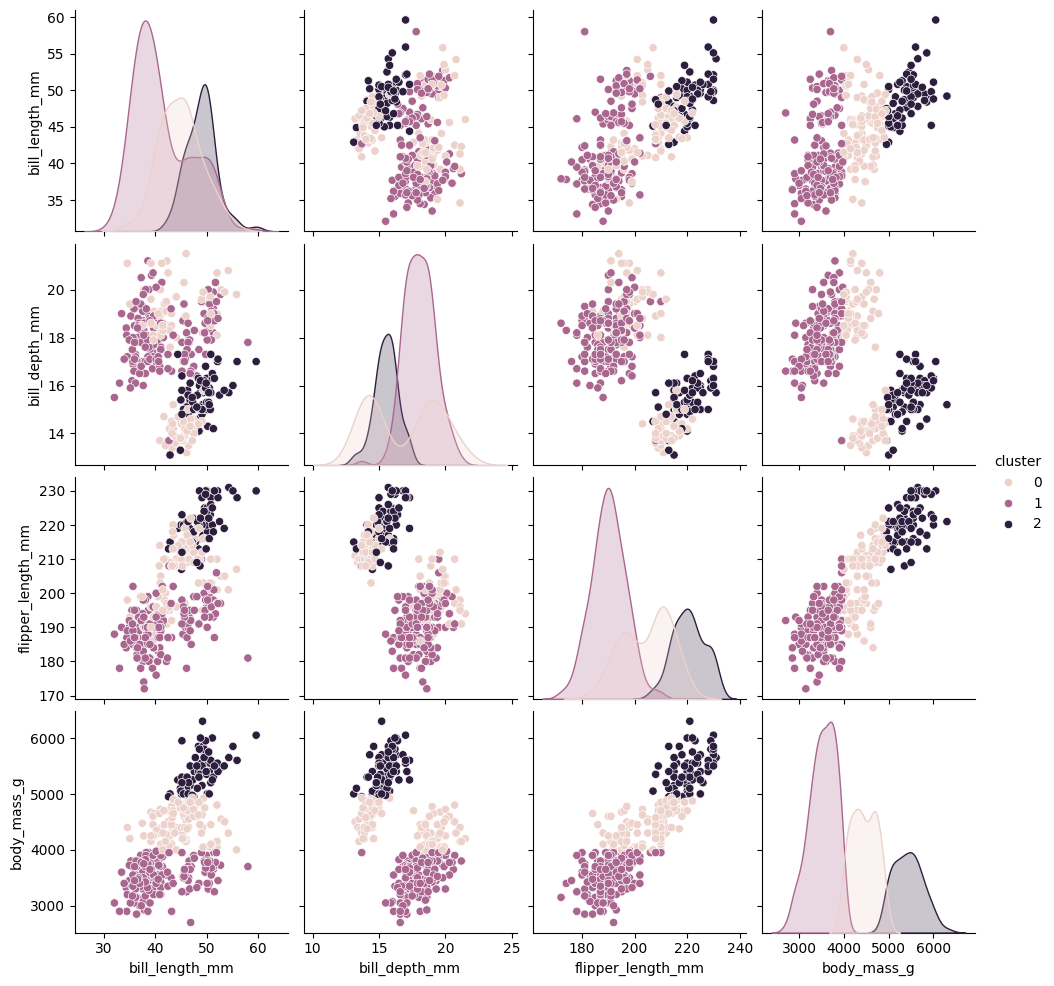

In [40]:
sns.pairplot(data=penguins, hue="cluster")#генерация попарных графиков с учётом группировки по "cluster"

homogeneity = homogeneity_score(penguins["species"], penguins["cluster"])#вычисление однородности кластеризации
completeness = completeness_score(penguins["species"], penguins["cluster"])#вычисление оценки полноты кластеризации
v_measure = v_measure_score(penguins["species"], penguins["cluster"]) #вычисление v_measure

#вывод результатов
print("Оценка однородности:", homogeneity)
print("Оценка полноты:", completeness)
print("v_measure:", v_measure)

Оценка однородности: 0.4005 - означает, что примерно 40% объектов в каждом кластере принадлежат к одному и тому же классу.

Оценка полноты: 0.4052 - означает, что примерно 40.52% объектов одного класса были правильно присвоены к одному кластеру.

v_measure: 0.4028 объединяет информацию об однородности и полноте в один показатель.

Значения ниже среднего, тк показатели находятся в диапозоне от 0 до 1

**Сравнение начальной картины и визуализации кластеризации**
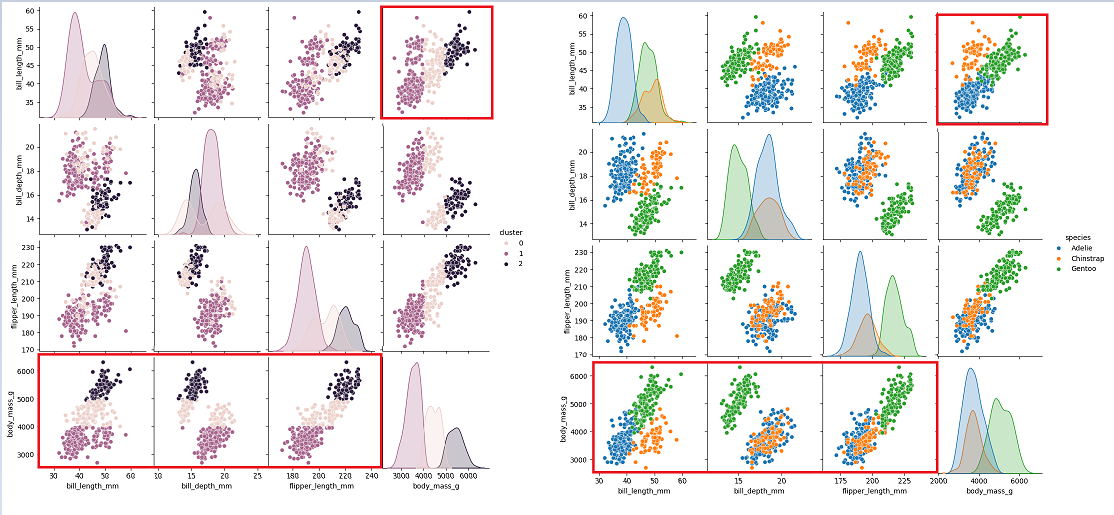

Общая картина визуализации кластеризации и графического анализ отличаются: изменились центры, также в визуализации кластериазции кластеры разделяются более чётко.

Из-за того, что кластеризация показала плохие результаты, необходим дополнительный анализ. Например возьмём два столбца данных (bill_mass_g и bill_lenght_mm)

In [44]:
X1 = penguins.iloc[:, [2,5]].values
wcss1 = [] #список для суммы квадратов расстояний

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++" ,random_state=42)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)  # inertia_ - это сумма квадратов расстояний

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Сумма квадратов расстояний')

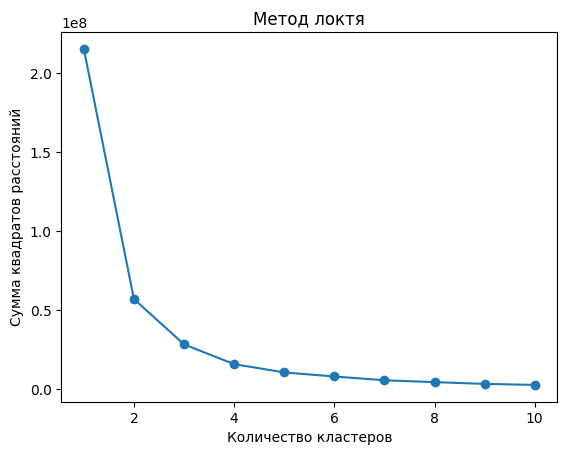

In [45]:
plt.plot(range(1, 11), wcss1,  marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')

Таким образом, оптимальное количество кластеров равно 3, тк после этого сумма квадратов расстояний не изменяется так сильно.


In [49]:
kmeans1 = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
y_kmeans = kmeans1.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

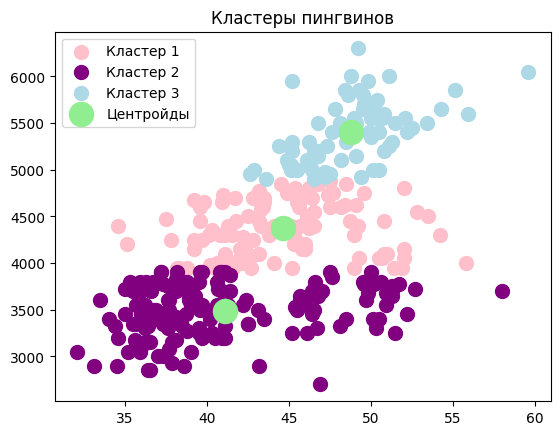

In [58]:
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans ==0, 1], s = 100, c = 'pink', label = 'Кластер 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans ==1, 1], s = 100, c = 'purple', label = 'Кластер 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans ==2, 1], s = 100, c = 'lightblue', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'lightgreen' , label = 'Центройды')
plt.title('Кластеры пингвинов')
plt.legend()
plt.show

In [53]:
homogeneity1 = homogeneity_score(penguins["species"], penguins["cluster1"])#вычисление однородности кластеризации
completeness1 = completeness_score(penguins["species"], penguins["cluster1"])#вычисление оценки полноты кластеризации
v_measure1 = v_measure_score(penguins["species"], penguins["cluster1"]) #вычисление v_measure

print("Оценка однородности:", homogeneity1)
print("Оценка полноты:", completeness1)
print("v_measure:", v_measure1)

Оценка однородности: 0.4081201608600207
Оценка полноты: 0.40604199036748795
v_measure: 0.407078423321094


Показетели немного улучшились по сравненению с кластеризацией по всем 4м столбцам